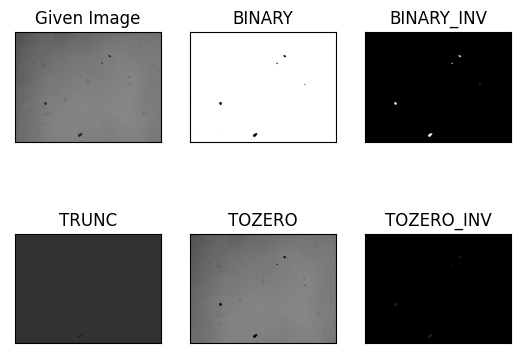

number of contours = 32
Number of circles = 3


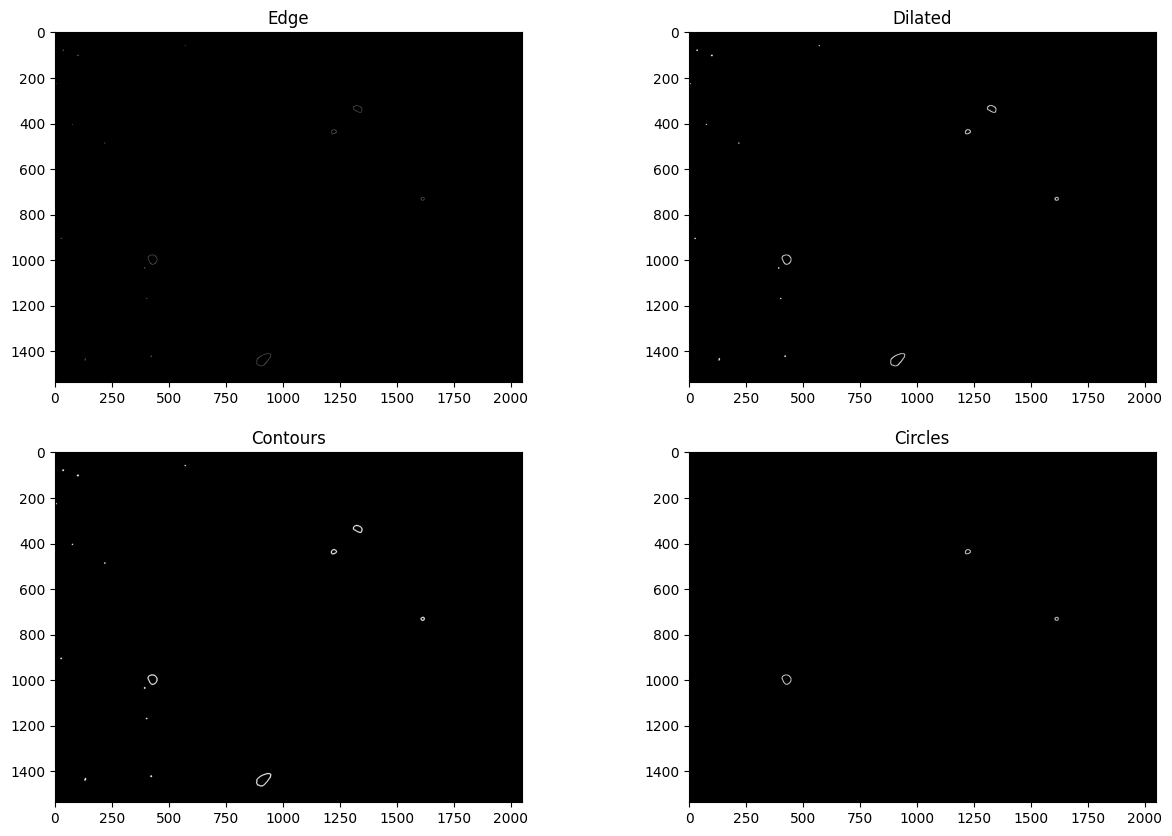

In [65]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the original image
img = cv2.imread(r"Optical Images - JAM Lab\H13\A1\bottom_1.tif")
# img_resized = cv2.resize(img,(1024,768))

# Convert to graycsale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image for better edge detection
img = cv2.GaussianBlur(img, (3,3), 0)

## Simple Thresholding
ret,thresh1 = cv2.threshold(img,70,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,50,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,50,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,50,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,50,255,cv2.THRESH_TOZERO_INV)
titles = ['Given Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure()
for i in range(6):
   plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
   plt.title(titles[i])
   plt.xticks([]),plt.yticks([])
plt.show()
 
 
# Canny Edge Detection
edges = cv2.Canny(image=thresh1, threshold1=100, threshold2=200) # Canny Edge Detection

# Image dilation
img_dilation = cv2.dilate(edges, None, iterations=1)

# Finding total Contour in image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("number of contours = " + str(len(contours)))
largest_contour = 0

contour_img = np.zeros(np.shape(img))

for i in range(len(contours)):
   cv2.drawContours(contour_img,contours,i,(255,0,0),3)
   if np.shape(contours[i])[0]>largest_contour:
      largest_contour = np.shape(contours[i])[0]
      largest_contr_idx = i

# Find circles
import numpy as np
# output = img.copy()
# output = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
op = np.zeros(np.shape(img))
circles = cv2.HoughCircles(img_dilation, cv2.HOUGH_GRADIENT, 1.3, 100)
# If some circle is found
if circles is not None:
   # Get the (x, y, r) as integers
   circles = np.round(circles[0, :]).astype("int")
   print(circles)
   # loop over the circles
   for (x, y, r) in circles:
      cv2.circle(output, (x, y), r, (0, 255, 0), 2)
# show the output image

contour_list = []
count = 0
for contour in contours:
   approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
   area = cv2.contourArea(contour)
   if ((len(approx) > 12) & (area > 0)): #& cv2.isContourConvex(approx)
      count+=1
      contour_list.append(contour)

cv2.drawContours(op, contour_list,  -1, (255,0,0), 2)

print("Number of circles = " + str(count))

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(edges, cmap='gray')
plt.title('Edge')
plt.subplot(222)
plt.imshow(img_dilation, cmap='gray')
plt.title('Dilated')
plt.subplot(223)
plt.imshow(contour_img, cmap='gray')
plt.title('Contours')
plt.subplot(224)
plt.imshow(op, cmap='gray')
plt.title('Circles')
plt.show()

Count = (4, 1, 2)


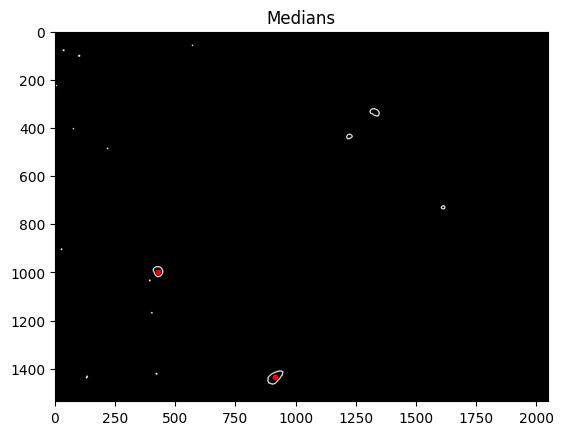

In [66]:
median = []
area_thresh = 1000
for contour in contours:
   approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
   area = cv2.contourArea(contour)
   if (area > area_thresh): #& cv2.isContourConvex(approx)
      median.append((np.sum(contour, axis=0))/len(contour))

plt.imshow(contour_img, cmap='gray')
for a in median:
   plt.plot(a[0][0], a[0][1], '.', color='red')
plt.title('Medians')
print("Count = " + str(np.shape(median)))

In [67]:
median

[array([[ 914.35582822, 1436.22699387]]),
 array([[ 914.19620253, 1436.18987342]]),
 array([[427.68421053, 997.15789474]]),
 array([[427.66363636, 997.08181818]])]

In [53]:
# TODO #

#update doc 
#hough didnt work, number of edges of 12, iscontourconvex not working properly
#put output in doc
#median of all points, mean of distance and devioation , deviation divided by mean, set up threshold, set up a threshold
#area print area threshold
#physics behind contour convex, findcontours